<a href="https://colab.research.google.com/github/s-ahmed6786/Deep-Learning/blob/main/MNIST_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random 

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The numnber of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The numnber of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28x28"

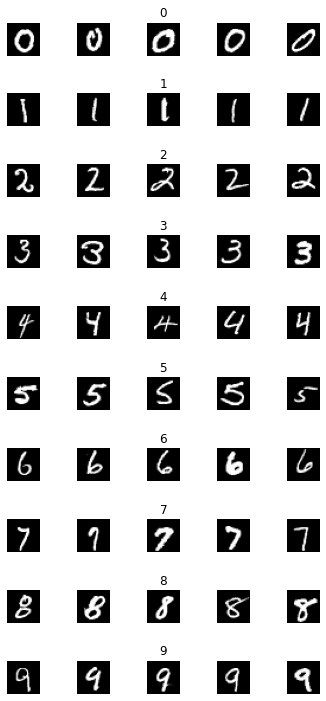

In [6]:
from os import NGROUPS_MAX
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows= num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range (cols):
  for j in range (num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

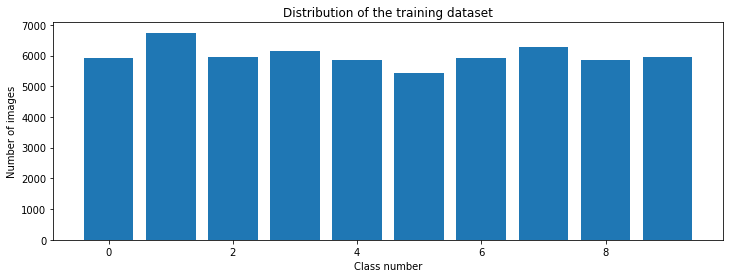

In [7]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)


In [11]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model



In [12]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
h = model.fit(X_train, y_train, validation_split= 0.1, epochs = 10, batch_size= 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.5831 - accuracy: 0.8135 - val_loss: 0.2800 - val_accuracy: 0.9168
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3066 - accuracy: 0.9081 - val_loss: 0.2469 - val_accuracy: 0.9257
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2709 - accuracy: 0.9179 - val_loss: 0.2160 - val_accuracy: 0.9330
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2624 - accuracy: 0.9205 - val_loss: 0.2065 - val_accuracy: 0.9357
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2468 - accuracy: 0.9258 - val_loss: 0.2159 - val_accuracy: 0.9345
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.9262 - val_loss: 0.2066 - val_accuracy: 0.9395
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2333 - accuracy: 0.9280 - val_loss: 0.2086 - val_accuracy: 0.9365
Epoch 

Text(0.5, 0, 'epoch')

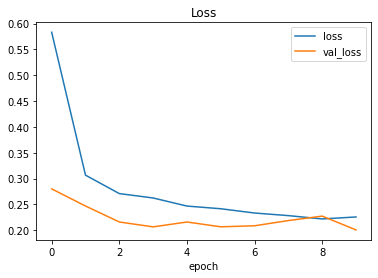

In [14]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

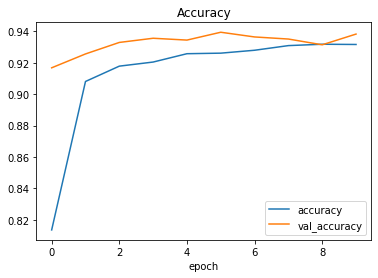

In [15]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose =0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.2503403425216675
Test accuracy: 0.925599992275238


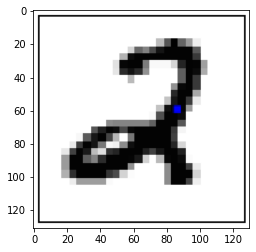

In [17]:
import requests
from PIL import Image 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

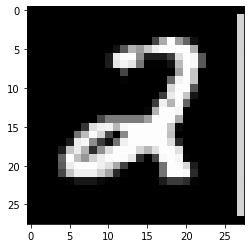

In [18]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))


In [19]:
image = image/255
image = image.reshape(1,784)

In [20]:
p_var = model.predict(image)
prediction = np.argmax(p_var , axis=1)
print("Predicted digit: ", str(prediction))

1/1 [==============================] - 0s 94ms/step
Predicted digit:  [2]
